In [1]:
import numpy as np
import itertools
from collections import Counter
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class MMboard:
    '''An instance of a MasterMind board.
    
    The object of the game is to guess the hidden code of length L, 
    where each code element is any one of C characters. 
    
    In response to a guess of the code, if the code is incorrect,
    a response (b, w) is provided; b represents the number of 
    characters where the correct character is provided in the 
    correct position, whereas w represents the number of characters
    that are in the code but are in the wrong position (i.e. the
    number of characters that are actually in the code but are not
    in the position guessed). 
    
    The game continues until the correct code is guessed, or until
    a predefined number of allowable tries have been exhausted. 
    
    Note: currently supports numcolors<=10. '''
    
    def __init__ (self, codelength=4, numcolors=6, max_tries=10, suppress_output=False):
        
        assert (codelength >= 1) and (max_tries >= 1)
        assert (numcolors >= 1)  and (numcolors <= 10)
        
        self._L = codelength
        self._C = numcolors
        self._N_iters = max_tries
        self._nooutput = suppress_output
        
        self._code = np.zeros(self._L)  # contains the code
        
        self.n_guessed = 0  # number of guesses tried
        self.gameover = False
    
    def _codeOK(self, cc):
        '''Helper function to check that inputs for code are in
        proper form. '''
        
        try:
            init = np.array([int(item) for item in cc])
        except:
            raise ValueError('Code not in the form of a list/array of length ' + str(self._L))

        if len(init) != self._L:
            raise ValueError('Code not of length ' + str(self._L))

        if not all(isinstance(item, int) for item in init):
            raise ValueError('Each character must be an integer, between 0 and ' + str(self._C - 1))

        if not((init >= 0).all() and (init <= self._C - 1).all()):
            raise ValueError('Each integer must be between 0 and ' + str(self._C - 1)) 
        
        return True
        
    def set_code(self, custom=None, showcode=True):
        '''Initalize/reset the code.
        
        Can set the code manually (provide a list or array of length L)
        or set one at random (default).
        
        Example: myboard.set_code([0, 1, 2, 3])
        
        showcode: whether or not the code being set is displayed
        '''
        
        if (custom is not None) and self._codeOK(custom):  
            self._code = np.array([int(item) for item in custom])
        else:
            self._code = np.random.randint(0, self._C, size=self._L)  # each element is [0, C)
        
        if showcode and (not self._nooutput):
            print "Code successfully initialized to ", self._code, "\n"
        elif not self._nooutput:
            print "Code successfully initialized. Good luck.\n"
            
        self.n_guessed = 0  # reset guess counter
        self.gameover = False
        
    def check_guess(self, guess, answer):
        '''Process a guess given the correct code.
        
        Take a guess in the form of a list of integers, and returns
        (number of characters in the correct position,
         number of characters in the wrong position but elsewhere in code).
         
        Usually, the answer will be the secret code (self._code), but this
        method can be used to compare any guess to any answer.
        
        Example: myboard.guess_code([0, 1, 2, 3], self._code)
        Returns: (1, 1)  # self._code is [2 1 4 4] '''
        
        # counters
        corpos = 0  
        wrongpos = 0  
        # track non-counted characters
        code_left = []
        guess_left = []
       
        # check for correct digit in correct place  
        for i, digit in enumerate(answer):            
            if digit==guess[i]:
                corpos += 1  
            else:
                code_left.append(digit)
                guess_left.append(guess[i])
            
        assert len(code_left) == len(guess_left)

        if len(code_left)>0:
            # check for correct digit in wrong place
            for digit in code_left:
                if digit in guess_left:
                    wrongpos += 1
                    guess_left.remove(digit) # removes only one occurrence
        
        return (corpos, wrongpos)

    def guess_code(self, guess):
        '''Entry method to process guess, with a check to see if number of guesses has
        been exceeded, or code guessed correctly.
        
        If game is over, self.gameover is set to True.
        
        Returns: a tuple - (number of characters in the correct position,
                            number of characters in the wrong position but elsewhere in code); 
                  None if there was an error in the guess; or
                  -1 if game is over'''

        if not self.gameover:
            try:
                assert self._codeOK(guess)
                self.n_guessed += 1
                if not self._nooutput:
                    print "guess #" + str(self.n_guessed) + " of " + str(self._N_iters) + ": you guessed ", guess 
                    sys.stdout.flush()
            except:
                if not self._nooutput:
                    print "  [Error] please enter a list of %i integers from 0 to %i. try again" % (self._L, self._C - 1)
                return None
        
            # get response
            b, w = self.check_guess(guess=guess, answer=self._code)
            assert (b + w) <= self._L

            if b == self._L:
                if not self._nooutput:
                    print "You have %i right item(s) in the right place" % b
                    print "You win!"
                self.gameover = True
                return (b, w)
            
            if not self._nooutput:                
                print "You have %i right item(s) in the right place, and" % b
                print "  %i right item(s) but in the wrong place\n" % w 
            
            if self.n_guessed == self._N_iters:
                if not self._nooutput:
                    print "Game over. The correct code was", self._code  
                self.gameover = True

            return (b, w)
        
        # else
        return -1  # game already over

In [3]:
a = MMboard()
# a = MMboard(suppress_output=True)

In [4]:
a.set_code([2, 1, 4, 4])

Code successfully initialized to  [2 1 4 4] 



In [5]:
a.guess_code([0, 1, 2, 4])

guess #1 of 10: you guessed  [0, 1, 2, 4]
You have 2 right item(s) in the right place, and
  1 right item(s) but in the wrong place



(2, 1)

In [6]:
a.guess_code([0, 3, 2, 4])

guess #2 of 10: you guessed  [0, 3, 2, 4]
You have 1 right item(s) in the right place, and
  1 right item(s) but in the wrong place



(1, 1)

In [7]:
a.guess_code([0, 3, 2, 9])

  [Error] please enter a list of 4 integers from 0 to 5. try again


In [8]:
a.guess_code([1, 1, 1, 1])

guess #3 of 10: you guessed  [1, 1, 1, 1]
You have 1 right item(s) in the right place, and
  0 right item(s) but in the wrong place



(1, 0)

In [9]:
a.guess_code([4, 4, 4, 4])

guess #4 of 10: you guessed  [4, 4, 4, 4]
You have 2 right item(s) in the right place, and
  0 right item(s) but in the wrong place



(2, 0)

In [10]:
a.guess_code([1, 2, 4, 4])

guess #5 of 10: you guessed  [1, 2, 4, 4]
You have 2 right item(s) in the right place, and
  2 right item(s) but in the wrong place



(2, 2)

In [11]:
a.guess_code([2, 1, 4, 4])

guess #6 of 10: you guessed  [2, 1, 4, 4]
You have 4 right item(s) in the right place
You win!


(4, 0)

In [12]:
a.guess_code([1, 1, 4, 4]) # game already over

-1

In [247]:
a.set_code([1, 1, 3, 3])

Code successfully initialized to  [1 1 3 3] 



In [248]:
a.guess_code([0, 0, 0, 0])

guess #1 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place



(0, 0)

In [249]:
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])

guess #2 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #3 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #4 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #5 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #6 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #7 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #8 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #9 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in

(0, 0)

In [250]:
a.guess_code([0, 0, 0, 0])

-1

In [244]:
b = MMboard()
b.set_code(showcode=False)

Code successfully initialized. Good luck.


In [245]:
b.guess_code([0, 0, 0, 0])

guess #1 of 10: you guessed  [0, 0, 0, 0]
you have 0 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [246]:
b.guess_code([1, 1, 1, 1])

guess #2 of 10: you guessed  [1, 1, 1, 1]
you have 1 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [247]:
b.guess_code([2, 2, 2, 2])

guess #3 of 10: you guessed  [2, 2, 2, 2]
you have 2 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [248]:
b.guess_code([3, 3, 3, 3])

guess #4 of 10: you guessed  [3, 3, 3, 3]
you have 0 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [249]:
b.guess_code([4, 4, 4, 4])

guess #5 of 10: you guessed  [4, 4, 4, 4]
you have 0 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [250]:
b.guess_code([1, 2, 2, 5])

guess #6 of 10: you guessed  [1, 2, 2, 5]
you have 1 right item(s) in the right place, and 3 right item(s) but in the wrong place


In [251]:
b.guess_code([5, 1, 2, 2])

guess #7 of 10: you guessed  [5, 1, 2, 2]
you have 2 right item(s) in the right place, and 2 right item(s) but in the wrong place


In [252]:
b.guess_code([5, 2, 1, 2])

guess #8 of 10: you guessed  [5, 2, 1, 2]
you have 4 right item(s) in the right place, and 0 right item(s) but in the wrong place
You win!


## Knuth's Algorithm (baseline)

In [275]:
def knuth(cl=4, nc=6, silent=False):
    # implements Knuth's Five-Guess Algorithm
    # expanded for arbitrary code lengths and alphabet
    # https://en.wikipedia.org/wiki/Mastermind_(board_game)
    # NOTE: we are using a 0-index

    k = MMboard(codelength=cl, numcolors=nc, suppress_output=silent)
    k.set_code()
    
    n_guesses = 0
    
    # 1. Create the set S of 1296 possible codes (1111, 1112 ... 6665, 6666)
    S = {}  # index is the string sequence, value is a cl-element tuple
    digits = list(np.arange(nc))
    for i in itertools.product(digits, repeat=cl):
        S[''.join(map(str, list(i)))] = list(i) 
    assert len(S) == nc**cl
    
    possible_guesses = S.copy()  # keep track of list of possible guesses

    # 2. Start with initial guess 1122    
    assert nc >= 2
    if cl==4:
        knuth_guess = [0, 0, 1, 1]  # 0-indexed
    else:
        knuth_guess = list(np.random.randint(0, nc, cl)) # n.b. random choice may be suboptimal

    # 7. loop
    while True:
        # this is not an infinite loop - 
        # maximum iterations governed by max number of possible guesses
        
        # delete current guess from possible guesses
        del possible_guesses[''.join(map(str, knuth_guess))]
        
        # 3. Play the guess to get a response of colored (b) and white pegs.
        response = k.guess_code(knuth_guess)
        n_guesses += 1

        # 4. If the response is four colored pegs, the game is won, the algorithm terminates.
        #    If maximum number of tries reached, the algorithm terminates.
        if ((response is not None) and response[0]==cl) or k.gameover:
            return n_guesses
        
        # 5. Otherwise, remove from S any code that would not give the same response 
        #    if it (the guess) were the code.
        # print "number of keys to check:", len(S)
        for code in S.keys():
            # Uses classes built-in check_guess function
            temp = k.check_guess(guess=S[code], answer=knuth_guess)
            if temp!=response:
                # print "deleted", S[code]
                del S[code]
        # print "number of keys left to check:", len(S)

        # 6. For each possible guess, that is, any unused code of the 1296 not just those in S, 
        #    calculate how many possibilities in S would be eliminated for each possible 
        #    colored/white peg score. The score of a guess is the minimum number of possibilities 
        #    it might eliminate from S. A single pass through S for each unused code of the 1296 
        #    will provide a hit count for each colored/white peg score found; the colored/white 
        #    peg score with the highest hit count will eliminate the fewest possibilities;
        #    calculate the score of a guess by using 
        #      "minimum eliminated" = "count of elements in S" - "highest hit count". 
        #    From the set of guesses with the maximum score, select one as the next guess, 
        #    choosing a member of S whenever possible.

        if len(S)==1:
            knuth_guess = S.values()[0]
            # print ''.join(map(str, knuth_guess)) in S
        else:
            # use of collection counter
            # inspired by http://stackoverflow.com/questions/20298190/mastermind-minimax-algorithm
            key = lambda g: max(Counter(k.check_guess(g, item) for item in S.values()).values())               
            # secondary sort by choosing member of S
            # inspired by https://docs.python.org/2/howto/sorting.html
            secondary_sort = sorted(possible_guesses.values(), key=lambda x: x not in S.values())
            knuth_guess = min(secondary_sort, key=key)
            
            # print ''.join(map(str, knuth_guess)) in S

        # print "next guess", knuth_guess

In [272]:
knuth()

Code successfully initialized to  [2 3 4 0] 

guess #1 of 10: you guessed  [0, 0, 1, 1]
You have 0 right item(s) in the right place, and
  1 right item(s) but in the wrong place

guess #2 of 10: you guessed  [4, 4, 2, 0]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

guess #3 of 10: you guessed  [4, 3, 0, 2]
You have 1 right item(s) in the right place, and
  3 right item(s) but in the wrong place

guess #4 of 10: you guessed  [2, 3, 4, 0]
You have 4 right item(s) in the right place
You win!


4

In [281]:
knuth(nc=10, cl=4) # 10 colors, code length 4

Code successfully initialized to  [7 3 0 2] 

guess #1 of 10: you guessed  [0, 0, 1, 1]
You have 0 right item(s) in the right place, and
  1 right item(s) but in the wrong place

guess #2 of 10: you guessed  [2, 1, 4, 0]
You have 0 right item(s) in the right place, and
  2 right item(s) but in the wrong place

guess #3 of 10: you guessed  [5, 6, 0, 4]
You have 1 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #4 of 10: you guessed  [8, 0, 3, 2]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

guess #5 of 10: you guessed  [3, 2, 7, 7]
You have 0 right item(s) in the right place, and
  3 right item(s) but in the wrong place

guess #6 of 10: you guessed  [7, 3, 0, 2]
You have 4 right item(s) in the right place
You win!


6

In [284]:
import time
N_sims = 10

alphabet = [2, 4, 6, 8, 10]  # number of possible `colors` per position
mean_guesses = np.zeros(len(alphabet))
mean_times = np.zeros(len(alphabet))

for j, a in enumerate(alphabet):
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        simguesses[i] = knuth(nc=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

In [285]:
mean_times

array([  8.61668587e-04,   3.87444496e-02,   1.07932272e+00,
         1.53864245e+01,   1.22476159e+02])

In [286]:
mean_guesses

array([ 3.2,  3.9,  4.6,  5.3,  6.1])

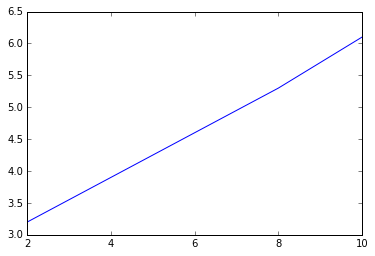

In [291]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_guesses);

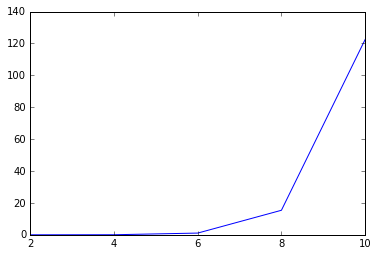

In [292]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_times);

times grow exponentially with number of colors

In [296]:
N_sims = 3

lengths = [2, 4, 6, 8, 10]  # number of possible code lengths
mean_guesses = np.zeros(len(lengths))
mean_times = np.zeros(len(lengths))

for j, a in enumerate(lengths):
    print j
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        simguesses[i] = knuth(cl=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

0
1
2


KeyboardInterrupt: 

In [297]:
mean_guesses

array([ 3.33333333,  4.33333333,  0.        ,  0.        ,  0.        ])

In [298]:
mean_times

array([ 0.00597239,  1.33273959,  0.        ,  0.        ,  0.        ])

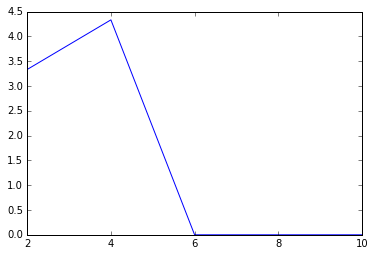

In [299]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_guesses);

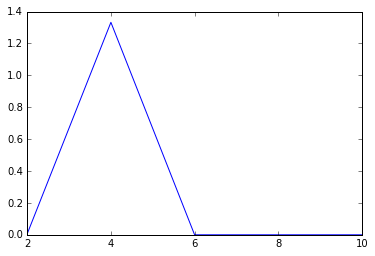

In [300]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_times);

problem blows up with longer lengths

# Simulated Annealing

In [49]:
import MMboard as mm
import copy

In [371]:
# >>> FIX:  I think we propose the actual solution, if it were true, then it would satisfy the rule 
#    in the objective function. so have to incorporate the string after all --> Done
    
class SAsim():
    
    '''An instance of a simulated annealing solution to solve Mastermind.

    These methods implement simulated annealing (SA)
    Reference: Bernier et al. "Solving MasterMind using GAs and simulated annealing:
    a case of dynamic constraint optimization"
    
    Bernier suggests SA finds best solution within a given time constraint
    but solution is suboptimal; without a time constraint, the algorithm 
    reduces to a random search.'''
    
    def __init__(self):
        # store previous guesses, along with response
        # key is the string sequence, values is the (b, w) tuple as returned by guess_code
        # supports up to N=10 digits (0-indexed) per position
        self._prev_guesses = {}
        
        self._best_guess = None  # stores best guess so far
        self._best_resp = None  # stores best response so far
    
    def _objective_function(self, guess):
        '''Implement Bernier objective function.
        
        `guess` is in the form of a list or numpy array.
        
        "Each combination is compared with the previously played guess, the
        number of different white and black pegs are computed and added to the
        cost... In this way, the cost increases with the number of unsatisfied
        rules." 
        
        The idea here is that given a new guess, would all the different
        responses for the previous attempts be satisfied if the new guess were
        actually the correct answer?  If so, then the new guess could possibly
        be the secret code. Otherwise, it cannot possibly be the new code,
        but may be close to it.'''

        assert self._sa._codeOK(guess)
        C = 0
        
        # print self._prev_guesses.values()
        
        for pg in self._prev_guesses:
            # get what response for a code would have been if the
            # guess is actually the right code
            prop_answer = [int(digit) for digit in list(pg)]
            b, w = self._sa.check_guess(guess=guess, answer=prop_answer)
            assert (b + w) <= self._sa._L
            
            # print "guess/answer ", guess, prop_answer, b, w
            
            diffw = self._prev_guesses[pg][1] - w
            diffb = self._prev_guesses[pg][0] - b
            # print "guess/answer ", guess, prop_answer, (b, w), self._prev_guesses[pg], "diffw", diffw, "diffb", diffb
            C += abs(diffw) + abs(diffw + diffb)
            
        # print "C", C
        
        return C
    
    def _change_guess(self, guess, repeats=5):
        '''Takes in a guess as a list of digits, and performs a permutation
        (change positions of a randomly chosen pair of digits) and a mutation
        (change value of randomly chosen digit).
        
        `repeats` is the step size (# of changes before returning)'''
        
        assert self._sa._codeOK(guess)
        guess_prime = copy.deepcopy(guess)
        
        # print max(repeats, 1)
        
        for i in xrange(max(repeats, 1)):

            # permutation
            if not ((self._best_guess == guess) and (self._best_resp[0] >= (self._sa._L - 1))):
                # do not permutate if all but one digits are already right
        
                idx1, idx2 = np.random.choice(len(guess), size=2, replace=False)

                temp = guess_prime[idx1]
                guess_prime[idx1] = guess_prime[idx2]
                guess_prime[idx2] = temp

            # mutation
            if not((self._best_guess == guess) and ((self._best_resp[0] + self._best_resp[1]) == self._sa._L)):
                # do not mutate if all digits found but in wrong spots
                idx3 = np.random.choice(len(guess))  # position
                col = np.random.choice(self._sa._C)  # proposed new color
                while idx3 == col:
                     col = np.random.choice(self._sa._C)  # try again

                guess_prime[idx3] = col
                
                if ((self._best_guess == guess) and (self._best_resp[0] >= (self._sa._L - 1))):
                    # if one digit is off, don't mutate more than one character
                    break
            
        return guess_prime

    def _closeness_score(self, resp):
        # the higher score, the more correct the answer
        # we cannot really use this as the objective function, since we need to actually
        # make a guess before getting this response (it is based on the actual code)
        # but we can use this to identify the final best answer
        
        # inspired the score for the genetic algorithm, we start with the following
        # score: 10 * black + 1 * white  # weights correct digit in correct position more heavily
        # response is in the form of a (b, w) tuple
        # however, we modify this so that if all the correct digits have been found (but answer is wrong)
        # this is just as good as finding all but one correct digits as we can reduce the
        # dimension of the search to one type (mutation, permutation)
        
        if (resp[0] != self._sa._L) and ((resp[0] + resp[1]) == self._sa._L):
            return (self._sa._L - 1) * 10
        
        return resp[0] * 10 + resp[1]
    
    def sa(self, guess, resp, init_temp, thermostat, ftol, itol, otol, reannealing, k): 
        '''Perform simulated annealing.'''

        obj_values = []  # stores objective function values from successive runs
        curr_guess = copy.deepcopy(guess)

        prev_E = 3 * self._sa._L  # arbitrarily large initial "energy"
        obj_values.append(prev_E)
        temperature = init_temp
        
        best_score = self._closeness_score(resp)  # store best objective function seen so far
        self._best_guess = guess  # store corresponding best guess
        self._best_resp = resp  # store corresponding best response

        # m = 200 # iterations before checking function tolerance
        it = 1 # acceptances counter
        atp = 1 # total number of iterations

        while True:

            L = np.floor(temperature).astype(int)  # alternative step size
            # L = np.floor(np.exp(temperature)).astype(int)  # alternative step size
            # L = np.floor(np.sqrt(temperature)).astype(int)  # step size
            # print "L", L
            # L = np.floor(np.log(temperature)).astype(int)  # alternative step size

            propose_guess = self._change_guess(curr_guess, L)
            
            # check whether proposed guess has already been guessed
            pg_str = ''.join(map(str, propose_guess))
            while pg_str in self._prev_guesses:
                propose_guess = self._change_guess(curr_guess) # guess again
                pg_str = ''.join(map(str, propose_guess))

            new_E = self._objective_function(propose_guess)
            delta_E = new_E - prev_E
            # print "proposed guess", propose_guess, new_E, "prev E", prev_E
            # print "reject", np.exp(- 1.0 * delta_E / (k * temperature))

            # print "delta_E, temp", (delta_E, temperature)
            # print np.exp(- delta_E / temperature)
            # accept equal or better?
            if (delta_E <= 0) or (np.random.rand() < np.exp(- 1.0 * delta_E / (k * temperature))):  # < 0.01
                # debugging
                if delta_E <= 0:
                    print "accepted better or equal, temperature:", temperature
                else:
                    print "accepted worse (random), temperature:", temperature
                    
                # accept proposal from which to make next guess
                curr_guess = propose_guess
                obj_values.append(new_E)
                prev_E = new_E
                it += 1   
                    
                # make the guess
                response = self._sa.guess_code(propose_guess)
                
                # keep track of best guess
                # print ">>> sc, bs", self._closeness_score(response), best_score
                if self._closeness_score(response) >= best_score:
                    # print "best_score", best_score
                    best_score = self._closeness_score(response)
                    self._best_guess = curr_guess  
                    self._best_resp = response
                          
                # If the response is four colored pegs, the game is won, the algorithm terminates.
                # If maximum number of tries reached, the algorithm terminates.
                if ((response is not None) and response[0]==self._sa._L) or self._sa.gameover:
                    # print obj_values
                    if response[0]!=self._sa._L:
                        print 'best guess', self._best_guess, self._best_resp, it
                        print 'actual', self._sa._code
                    break
                
                # Otherwise, cache the response
                self._prev_guesses[pg_str] = response
                
            atp += 1
            
            temperature = thermostat * temperature  

            # print "<><> sc, bs", self._closeness_score(response), best_score
            if (temperature <= 2) and (self._closeness_score(response) < best_score):
                # print "reheat"
                # reheat when trying another set of scores
                temperature = init_temp * 0.8
            # determine when to reheat
            # if (it % reannealing) == 0:
                # temperature = thermostat * temperature      
                # if temperature < 1:
                    #reheat
                    # temperature = 100

            # termination conditions
            # if (len(obj_values) > m) and np.std(obj_values[-m:])/np.mean(obj_values[-m:]) < ftol: 
            #    print 'ftol: convergence', min_obj_value
            #    break
            if atp > itol:
                print 'itol: maximum iterations reached'
                print 'best guess', self._best_guess, self._best_resp, it
                print 'actual', self._sa._code
                break
            # if ______  <= otol:
            #    print 'otol: _______ ' 
            #    break

        if not(self._sa._nooutput):
            plt.figure()
            plt.plot(obj_values)
            plt.title("Objective function")

        return self._best_guess, self._best_resp, it

    def runSA(self, cl=4, nc=6, silent=False, time=None):
        '''Set up board and run SA algorithm. '''

        self._sa = MMboard(codelength=cl, numcolors=nc, suppress_output=silent)
        self._sa.set_code()

        # n_guesses = 0

        # initial guess
        sa_guess = list(np.random.randint(0, nc, cl))
        
        # play the guess to get a response of colored (b) and white pegs.
        response = self._sa.guess_code(sa_guess)
        
        # If the response is four colored pegs, the game is won, the algorithm terminates.
        # If maximum number of tries reached, the algorithm terminates.
        if ((response is not None) and response[0]==cl) or self._sa.gameover:
            return (sa_guess, response, 1)
        
        # Otherwise, cache the response
        self._prev_guesses[''.join(map(str, sa_guess))] = response
        
        # we fiddled around with these parameters
        init_temp = 6
        thermostat = 0.98
        k = 0.2  # try slightly bigger fractions for larger spaces
        # ftol = 0.01
        # itol = mm.
        # otol = 0.

        return self.sa(sa_guess, response, init_temp, thermostat, _, 50000, _, _, k)

Code successfully initialized to  [5 3 4 0] 

guess #1 of 10: you guessed  [2, 4, 3, 0]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

accepted better or equal
guess #2 of 10: you guessed  [3, 4, 1, 0]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

accepted worse (random)
guess #3 of 10: you guessed  [2, 3, 0, 4]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

accepted worse (random)
guess #4 of 10: you guessed  [2, 4, 0, 5]
You have 0 right item(s) in the right place, and
  3 right item(s) but in the wrong place

accepted worse (random)
guess #5 of 10: you guessed  [5, 5, 4, 2]
You have 2 right item(s) in the right place, and
  0 right item(s) but in the wrong place

accepted better or equal
guess #6 of 10: you guessed  [4, 3, 4, 2]
You have 2 right item(s) in the right place, and
  0 right item(s) but in the wrong place

accepted better or equal
guess #7 

([5, 3, 4, 0], (4, 0), 9)

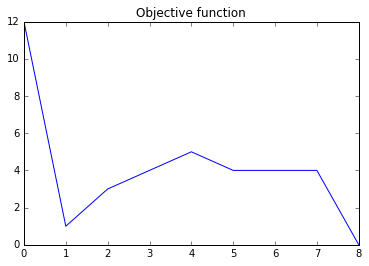

In [372]:
s = SAsim()
s.runSA(cl=4, silent=False)

In [301]:
import time
N_sims = 10

alphabet = [2, 4, 6, 8, 10]  # number of possible `colors` per position
mean_guesses = np.zeros(len(alphabet))
mean_times = np.zeros(len(alphabet))

for j, a in enumerate(alphabet):
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        s = SAsim()
        simguesses[i] = s.runSA(nc=a, silent=True)[2]
        # simguesses[i] = knuth(nc=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

itol: maximum iterations reached
best guess [0, 2, 1, 1] (3, 0) 8
actual [0 2 2 1]
best guess [5, 1, 1, 0] (2, 1) 10
actual [1 0 1 0]
itol: maximum iterations reached
best guess [4, 2, 7, 0] (1, 3) 8
actual [4 0 2 7]
best guess [1, 7, 6, 6] (3, 0) 10
actual [1 7 1 6]
best guess [7, 7, 6, 1] (2, 1) 10
actual [7 2 7 1]
itol: maximum iterations reached
best guess [7, 4, 5, 2] (1, 3) 8
actual [5 4 2 7]
best guess [2, 3, 4, 4] (1, 3) 10
actual [4 2 3 4]
best guess [4, 4, 4, 6] (3, 0) 10
actual [4 4 4 4]
best guess [1, 4, 5, 5] (2, 0) 10
actual [1 4 1 1]
best guess [0, 6, 5, 9] (1, 1) 10
actual [0 8 4 6]
best guess [7, 5, 3, 1] (3, 0) 10
actual [7 5 6 1]
best guess [5, 8, 8, 3] (2, 0) 10
actual [0 6 8 3]
best guess [8, 7, 2, 5] (3, 0) 10
actual [2 7 2 5]
best guess [4, 7, 4, 1] (3, 0) 10
actual [8 7 4 1]
best guess [0, 7, 4, 8] (2, 1) 10
actual [0 0 4 7]
itol: maximum iterations reached
best guess [3, 3, 4, 5] (1, 0) 4
actual [9 2 0 5]


In [302]:
mean_guesses

array([ 3.2,  7.6,  8.4,  9.3,  8.9])

In [303]:
mean_times

array([  9.64808464e-04,   6.20761418e-01,   2.81676292e-02,
         1.48434622e+00,   5.92431068e-01])

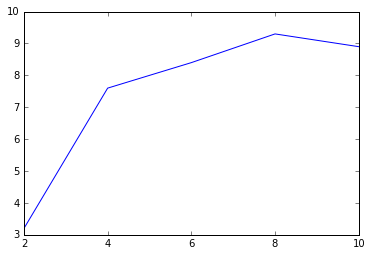

In [304]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_guesses);

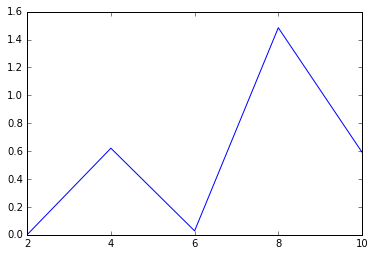

In [305]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_times);

In [306]:
N_sims = 3

lengths = [2, 4, 6, 8, 10]  # number of possible code lengths
mean_guesses = np.zeros(len(lengths))
mean_times = np.zeros(len(lengths))

for j, a in enumerate(lengths):
    print j
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        s = SAsim()
        simguesses[i] = s.runSA(cl=a, silent=True)[2]
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

0
1
best guess [2, 0, 0, 0] (2, 1) 10
actual [4 0 0 2]
2
best guess [5, 4, 1, 2, 0, 1] (2, 3) 10
actual [0 5 2 2 4 1]
best guess [3, 2, 3, 0, 0, 5] (4, 2) 10
actual [3 2 0 3 0 5]
best guess [5, 2, 2, 5, 1, 5] (3, 0) 10
actual [5 3 3 5 5 5]
3
itol: maximum iterations reached
best guess [4, 2, 0, 0, 0, 3, 5, 1] (6, 0) 7
actual [4 4 3 0 0 3 5 1]
itol: maximum iterations reached
best guess [3, 5, 5, 0, 0, 0, 1, 4] (2, 5) 6
actual [1 5 0 3 5 4 1 0]
4
best guess [4, 3, 1, 5, 3, 3, 1, 4, 2, 2] (7, 2) 10
actual [3 3 1 3 5 3 1 4 2 2]
best guess [0, 3, 3, 3, 5, 1, 4, 2, 1, 3] (4, 6) 10
actual [1 3 4 0 5 3 2 3 1 3]
best guess [4, 2, 0, 4, 2, 0, 4, 5, 1, 1] (4, 4) 10
actual [4 2 5 2 4 3 0 5 1 0]


In [307]:
mean_guesses

array([  5.33333333,   9.66666667,  10.        ,   7.66666667,  10.        ])

In [308]:
mean_times

array([  1.17365519e-03,   1.96415583e-02,   3.91426086e-02,
         6.65229670e+00,   1.13671700e+00])

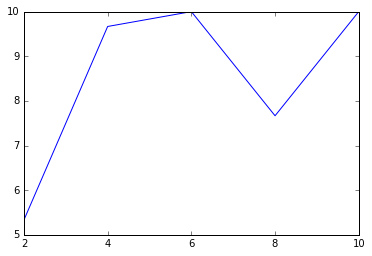

In [309]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_guesses);

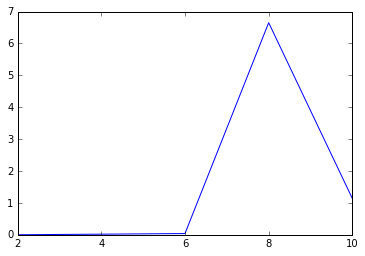

In [310]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_times);

## Random-Search with Constraints

In [28]:
def random_search(cl=4, nc=6, silent=False):
    # implements Random-Search with constraints
    # expanded for arbitrary code lengths and alphabet
    # https://en.wikipedia.org/wiki/Mastermind_(board_game)
    # NOTE: we are using a 0-index

    rs = MMboard(codelength=cl, numcolors=nc, suppress_output=silent)
    rs.set_code()
    
    n_guesses = 0
    
    # Create the set S of 1296 possible codes (1111, 1112 ... 6665, 6666)
    S = {}  # index is the string sequence, value is a cl-element tuple
    digits = list(np.arange(nc))
    for i in itertools.product(digits, repeat=cl):
        S[''.join(map(str, list(i)))] = list(i) 
    assert len(S) == nc**cl
    
    possible_guesses = S.copy()  # keep track of list of possible guesses

    # Start with a random guess   
    assert nc >= 2
    rs_guess = list(np.random.randint(0, nc, cl))

    # loop
    while True:
        # this is not an infinite loop - 
        # maximum iterations governed by max number of possible guesses
        
        # delete current guess from possible guesses
        del possible_guesses[''.join(map(str, rs_guess))]
        
        # Play the guess to get a response of colored (b) and white pegs.
        response = rs.guess_code(rs_guess)
        n_guesses += 1

        # If the response is four colored pegs, the game is won, the algorithm terminates.
        #  If maximum number of tries reached, the algorithm terminates.
        if ((response is not None) and response[0]==cl) or rs.gameover:
            return n_guesses
        
        # Otherwise, remove from S any code that would not give the same response 
        #   if it (the guess) were the code.
        # print "number of keys to check:", len(S)
        for code in S.keys():
            # Uses classes built-in check_guess function
            temp = rs.check_guess(guess=S[code], answer=rs_guess)
            if temp!=response:
                # print "deleted", S[code]
                del S[code]
        # print "number of keys left to check:", len(S)

        # For each possible guess, that is, any unused code of the 1296 not just those in S,
        # select a code at random as the next guess

        if len(S)==1:
            rs_guess = S.values()[0]
            # print ''.join(map(str, rs_guess)) in S
        else:
            selection = np.random.randint(len(S))
            # print S.values()
            rs_guess = S.values()[selection]

        # print "next guess", rs_guess

In [21]:
random_search()

Code successfully initialized to  [4 1 3 0] 

guess #1 of 10: you guessed  [4, 2, 1, 5]
You have 1 right item(s) in the right place, and
  1 right item(s) but in the wrong place

[[5, 3, 1, 0], [4, 3, 0, 1], [4, 0, 2, 4], [4, 0, 2, 2], [4, 0, 2, 3], [4, 0, 2, 0], [0, 5, 4, 5], [3, 2, 5, 0], [2, 3, 1, 2], [2, 3, 1, 3], [2, 3, 1, 0], [2, 3, 1, 1], [0, 1, 1, 2], [0, 1, 1, 4], [4, 5, 5, 4], [4, 5, 5, 3], [4, 5, 5, 0], [3, 0, 2, 5], [0, 1, 0, 5], [0, 2, 0, 4], [0, 2, 0, 1], [1, 0, 1, 4], [1, 0, 1, 2], [1, 2, 3, 0], [1, 2, 3, 1], [1, 2, 3, 2], [1, 2, 3, 3], [1, 3, 3, 5], [1, 1, 3, 5], [4, 3, 5, 4], [4, 3, 5, 0], [4, 4, 2, 2], [4, 4, 2, 0], [4, 4, 2, 4], [3, 2, 5, 2], [3, 2, 5, 3], [4, 1, 0, 1], [4, 1, 0, 0], [4, 1, 0, 3], [4, 1, 0, 4], [5, 1, 3, 5], [4, 5, 4, 3], [3, 4, 5, 5], [5, 4, 0, 5], [3, 2, 0, 4], [3, 2, 0, 1], [5, 2, 2, 3], [5, 2, 2, 2], [5, 2, 2, 0], [0, 2, 5, 0], [0, 2, 5, 3], [0, 2, 5, 2], [1, 0, 5, 5], [2, 2, 2, 4], [2, 2, 2, 1], [5, 3, 4, 5], [0, 0, 2, 5], [4, 5, 0, 4], [4, 5, 0

5

In [22]:
random_search(nc=10, cl=4) # 10 colors, code length 4

Code successfully initialized to  [9 9 2 8] 

guess #1 of 10: you guessed  [9, 3, 7, 3]
You have 1 right item(s) in the right place, and
  0 right item(s) but in the wrong place

[[0, 0, 5, 3], [9, 5, 2, 8], [9, 5, 2, 9], [9, 2, 5, 8], [9, 2, 5, 9], [9, 2, 5, 6], [9, 2, 5, 4], [9, 2, 5, 5], [9, 2, 5, 2], [9, 2, 5, 0], [9, 2, 5, 1], [2, 1, 4, 3], [2, 6, 8, 3], [1, 1, 7, 7], [1, 1, 7, 6], [1, 1, 7, 5], [1, 1, 7, 4], [1, 1, 7, 2], [1, 1, 7, 1], [1, 1, 7, 0], [1, 1, 7, 8], [8, 0, 1, 3], [2, 3, 1, 6], [4, 8, 4, 3], [2, 3, 0, 8], [0, 2, 8, 3], [5, 8, 4, 3], [4, 6, 2, 3], [2, 3, 0, 0], [6, 2, 1, 3], [6, 8, 1, 3], [8, 8, 4, 3], [1, 5, 4, 3], [5, 6, 1, 3], [9, 5, 2, 4], [9, 5, 2, 5], [9, 5, 2, 6], [9, 5, 2, 0], [9, 5, 2, 1], [9, 5, 2, 2], [6, 7, 7, 8], [6, 7, 7, 4], [6, 7, 7, 5], [6, 7, 7, 6], [6, 7, 7, 7], [6, 7, 7, 0], [6, 7, 7, 1], [6, 7, 7, 2], [9, 9, 6, 4], [9, 9, 6, 5], [9, 9, 6, 6], [9, 9, 6, 0], [9, 9, 6, 1], [9, 9, 6, 2], [9, 9, 6, 8], [9, 9, 6, 9], [9, 5, 0, 8], [9, 5, 0, 9], [9, 5, 0

9

In [23]:
import time
N_sims = 10

alphabet = [2, 4, 6, 8, 10]  # number of possible `colors` per position
mean_guesses = np.zeros(len(alphabet))
mean_times = np.zeros(len(alphabet))

for j, a in enumerate(alphabet):
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        simguesses[i] = random_search(nc=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

[[0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1]]
[[0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0]]
[[0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 0, 0, 1]]
[[0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 1, 1]]
[[0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1]]
[[0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 1, 1]]
[[0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1]]
[[0, 1, 1, 0], [0, 0, 1, 1]]
[[0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1]]
[[0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0]]
[[0, 0, 1, 1], [1, 0, 1, 0]]
[[0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0]]
[[0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 1, 1]]
[[3, 3, 2, 3], [2, 3, 2, 3], [3, 1, 2, 3], [1, 3, 3, 1], [2, 3, 3, 1], [0, 1, 2, 0], [3, 3, 3, 2], [3, 3, 3, 1], [3, 1, 3, 1], [2, 3, 1, 3], [0, 1, 1, 0], [0, 3, 2, 1], [0, 3, 2, 2], [3, 0, 2, 2], [3, 0, 2, 1], [0, 2, 0, 2], [0, 2, 0, 0], [0, 2, 0, 1], [2, 0, 2, 0], [1, 0, 1, 0], [1, 2, 3, 0], [1, 1,

In [24]:
mean_times

array([ 0.00057921,  0.0050616 ,  0.01769538,  0.04799936,  0.12074351])

In [25]:
mean_guesses

array([ 2.9,  3.8,  4.4,  5.5,  5.8])

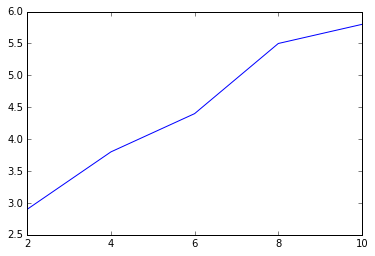

In [26]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_guesses);

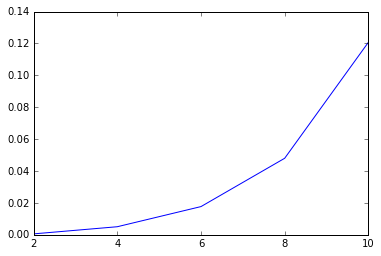

In [27]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_times);

Surprisingly, very quick.

In [29]:
N_sims = 3

lengths = [2, 4, 6, 8, 10]  # number of possible code lengths
mean_guesses = np.zeros(len(lengths))
mean_times = np.zeros(len(lengths))

for j, a in enumerate(lengths):
    print j
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        simguesses[i] = random_search(cl=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

0
1
2
3
4


KeyboardInterrupt: 

Busts when length is large, probably no surprise since we have to store and work with a set S that is initially 6^10 = 60466176

In [30]:
mean_times

array([  6.53584798e-04,   2.37449805e-02,   6.20295048e-01,
         3.26489858e+01,   0.00000000e+00])

In [31]:
mean_guesses

array([ 4.        ,  4.33333333,  4.33333333,  6.66666667,  0.        ])

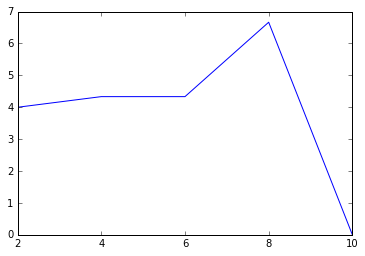

In [32]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_guesses);

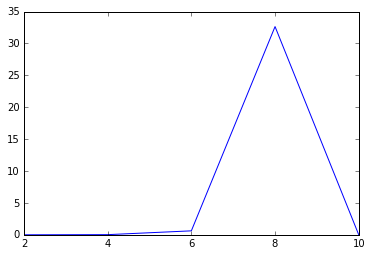

In [33]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_times);